In [82]:
import os
import glob
import importlib
import pandas as pd
import numpy as np

import analyze2p.arousal.dlc_utils as dlcutils
import analyze2p.arousal.parse_face_data as pf
import analyze2p.aggregate_datasets as aggr
import analyze2p.utils.helpers as hutils

In [2]:
# Pupil -------------------------------------------
pupil_feature='pupil_fraction'
pupil_epoch='stimulus'
pupil_snapshot=391800
redo_pupil=False
pupil_framerate=20.
eyetracker_dir = '/n/coxfs01/2p-data/eyetracker_tmp'
# -------------------------------------------------
alignment_type='trial'

#### parse_pose_data()

In [474]:
# animalid ='JC084'
# session='20190525'
# fov='FOV1_zoom2p0x'

datakey = '20190617_JC097_fov1'
experiment='gratings'
session, animalid, fovnum = hutils.split_datakey_str(datakey)

traceid='traces001'
rootdir='/n/coxfs01/2p-data'
snapshot=391800
iti_pre=1.
iti_post=1.
verbose=False

In [475]:
importlib.reload(dlcutils)

<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [476]:
#### Load pupil data
feature_list = []
if 'pupil' in pupil_feature:
    feature_list.append('pupil')
trialmeta, pupildata, params = dlcutils.get_pose_data(
                                    datakey, experiment, 
                                    realign=True, recombine=False,
                                    feature_list=feature_list, #[feature_name], 
                                    alignment_type=alignment_type,
                                    iti_pre=iti_pre, iti_post=iti_post,
                                    verbose=verbose, snapshot=snapshot,
                                    eyetracker_dir=eyetracker_dir)

[20190617_JC097_fov1, gratings] Found runs: ['1', '3', '4', '5']
... finding all movies for dset: 20190617_JC097_fov1
----- File 1.-----
... Eyetracker: 20190617_JC097_fov1_gratings_f1_20190617173728037806
... missing 8 frames, added 6
... Full run duration: 17.93 min
----- File 3.-----
... Eyetracker: 20190617_JC097_fov1_gratings_f3_20190617195654557782
... missing 151 frames, added 150
... Full run duration: 16.43 min
----- File 4.-----
... Eyetracker: 20190617_JC097_fov1_gratings_f4_20190617210231719937
... missing 234 frames, added 235
... Full run duration: 11.65 min
----- File 5.-----
... Eyetracker: 20190617_JC097_fov1_gratings_f5_20190617214055043526
... missing 120 frames, added 120
... Full run duration: 7.01 min
... There were 0 missing DLC results.


In [494]:
# #### Parse traces into trials
# # Get labels
# labels = aggr.load_frame_labels(datakey, experiment, 
#                             traceid=traceid, rootdir=rootdir)
# print(labels.head())

# # Parse
# pupiltraces, missing_trials = dlcutils.traces_to_trials(trialmeta, pupildata, labels,
#                     return_missing=True, verbose=False)

# ptraces, params = dlcutils.align_traces(datakey, experiment,
#                                         trialmeta, pupildata, params)

In [495]:
importlib.reload(dlcutils)

<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [482]:
# trialmeta, pupildata = dlcutils.add_trial_labels(trialmeta, pupildata, labels)
# trialmeta.head()

,start_ix,end_ix,trial_in_run,run_label,run_num,alignment_type,stim_dur_ms,actual_iti_ms,pre_iti_ms,post_iti_ms,movie,config,trial
0,19.0,69.0,1.0,1,1.0,trial,500.0,2000.0,1000.0,1000.0,20190617_JC097_fov1_gratings_f1,config040,1
1,70.0,120.0,2.0,1,1.0,trial,500.0,2000.0,1000.0,1000.0,20190617_JC097_fov1_gratings_f1,config044,2
2,120.0,170.0,3.0,1,1.0,trial,500.0,2000.0,1000.0,1000.0,20190617_JC097_fov1_gratings_f1,config009,3
3,171.0,221.0,4.0,1,1.0,trial,500.0,2000.0,1000.0,1000.0,20190617_JC097_fov1_gratings_f1,config039,4
4,222.0,272.0,5.0,1,1.0,trial,500.0,2000.0,1000.0,1000.0,20190617_JC097_fov1_gratings_f1,config003,5


In [485]:
# for tix, (trial, g) in enumerate(trialmeta.groupby(['trial'])):
#     run_label = g['run_label'].unique()[0]    
#     (e_start, e_end), = g[['start_ix', 'end_ix']].values
#     if e_start in [np.nan, None] or e_end in [np.nan, None]:
#         print("NAN")
#     pdf = pupildata[pupildata['run_label']==run_label]\
#                 .iloc[int(e_start):int(e_end)+1]

        

ValueError: cannot convert float NaN to integer

In [473]:
# Combines:
# dlcutils.get_pose_data()
# dlcutils.traces_to_trials()
realign=True
recombine=False
ptraces, params = dlcutils.parse_pose_data(datakey, experiment, 
                                  feature_name=pupil_feature, 
                                  alignment_type=alignment_type,
                                  realign=realign, recombine=recombine)                              

Parsing pose data.
[gratings] Found runs: ['1', '2', '3', '4']
... finding all movies for dset: 20190616_JC097_fov1
... finding all movies for dset: 20190616_JC097_fov1
----- File 1.-----
... Eyetracker: 20190616_JC097_fov1_gratings_f1_20190616160805637406
... missing 37 frames, added 36
... Full run duration: 14.37 min
----- File 2.-----
... Eyetracker: 20190616_JC097_fov1_gratings_f2_20190616165629022983
... missing 19 frames, added 18
... Full run duration: 17.07 min
----- File 3.-----
... Eyetracker: 20190616_JC097_fov1_gratings_f3_20190616181103248611
... missing 7 frames, added 6
... Full run duration: 15.99 min
----- File 4.-----
... Eyetracker: 20190616_JC097_fov1_gratings_f4_20190616191115754162
... missing 1 frames, added 0
... Full run duration: 15.47 min
... There were 0 missing DLC results.
Splitting traces into trials
... Missing 48 trials total
Saved.


In [43]:
# Test loading, output of:  dlcutils.parse_pose_data()
# dlcutils.aggregate_traces() calls this
fov_traces, fov_params = dlcutils.load_fov_traces(datakey, experiment,
                                                  alignment_type=alignment_type)


In [42]:
importlib.reload(dlcutils)

<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

#### Calculate trial metrics

In [107]:
# df_ = dlcutils.parsed_traces_to_metrics(fov_traces, 
#                                         in_rate=pupil_framerate, 
#                                         out_rate=pupil_framerate,
#                                         trial_epoch=pupil_epoch, 
#                                         iti_pre=iti_pre, iti_post=iti_post)
# df_.head()

,pupil_maj,pupil_min,pupil_area,run_label,run_num,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms,stim_on,frame_ix,pupil_fraction
0,17.233256,13.257589,717.793048,1.0,1.0,1.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5,0.664953
1,17.567621,12.021011,663.443263,1.0,1.0,2.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5,0.614604
2,15.089117,12.601474,597.365206,1.0,1.0,3.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5,0.553390
3,14.178862,11.733863,522.687026,1.0,1.0,4.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5,0.484210
4,12.877522,10.125026,409.617569,1.0,1.0,5.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5,0.379464


# Check frames

In [92]:
import cv2
import pylab as pl
%matplotlib notebook

In [330]:
in_rate=20.
out_rate=20.

In [70]:
src_dirs = dlcutils.get_raw_experiment_dirs(datakey, experiment='gratings')

... finding all movies for dset: 20190616_JC097_fov1
/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f1_20190616160805637406
/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f2_20190616165629022983
/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f3_20190616181103248611
/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f4_20190616191115754162


In [96]:
for s, (p, g) in zip(src_dirs, pupildata.groupby(['run_num'])):
    print(s)
    vidmeta = dlcutils.get_video_metadata_for_run(s)
    print(vidmeta[['frame_count', 'expected_frame_count']])
    print('... parsed run %i, %i frames' % (p, len(g)))

/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f1_20190616160805637406
   frame_count  expected_frame_count
0        17206                 17243
... parsed run 1, 17206 frames
/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f2_20190616165629022983
   frame_count  expected_frame_count
0        20469                 20488
... parsed run 2, 20469 frames
/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f3_20190616181103248611
   frame_count  expected_frame_count
0        19178                 19185
... parsed run 3, 19178 frames
/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f4_20190616191115754162
   frame_count  expected_frame_count
0        18566                 18567
... parsed run 4, 18566 frames


In [427]:
in_rate=20.
out_rate=20.

run_num = 1
trial_num = 1
plot_trials = False

nsec_plot = 20*1

stim_dur = fov_params['stim_dur']
stim_on = int(round(iti_pre*out_rate))
nframes_on = int(round(stim_dur*out_rate))
feat='pupil_area'

if plot_trials:
    rundf = fov_traces[fov_traces['run_num']==run_num].copy()
    frame_ixs = rundf[rundf['trial']==trial_num].index.tolist()
else:
    rundf = pupildata[pupildata['run_num']==run_num].copy()
    nframes_plot = nsec_plot * video_rate
    frame_ixs = np.arange(0, nframes_plot).astype(int) 

plotdf = rundf.loc[frame_ixs].copy()


In [428]:
all_frames = sorted(glob.glob(os.path.join(curr_src, 'frames','*.png')),
                         key=hutils.natural_keys) # os.listdir(src_dirs[0])
all_frames[0:5]

['/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f1_20190616160805637406/frames/1.png',
 '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f1_20190616160805637406/frames/2.png',
 '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f1_20190616160805637406/frames/3.png',
 '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f1_20190616160805637406/frames/4.png',
 '/n/coxfs01/2p-data/eyetracker_tmp/20190616_JC097_fov1_gratings_f1_20190616160805637406/frames/5.png']

In [429]:
curr_src = src_dirs[run_num-1]
# curr_frames = sorted(glob.glob(os.path.join(curr_src, 'frames','*.png')),
#                         key=hutils.natural_keys) # os.listdir(src_dirs[0])
# len(curr_frames)
framedict={}
for ix in frame_ixs:
    fp = os.path.join(curr_src, 'frames', '%i.png' % int(ix+1))
    im = cv2.imread(fp, 0)
    framedict[ix] = im

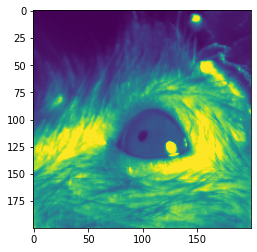

In [430]:
pl.figure()
x0, x1 = 0, 200
y0, y1 = 250, 450
pl.imshow(im[x0:x1, y0:y1])

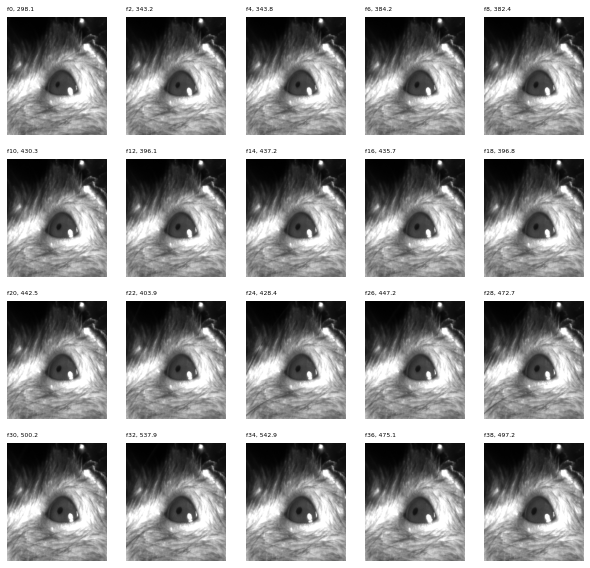

In [431]:
feat='pupil_area'

fig, axn = pl.subplots(4,5, figsize=(8,10))
for ax, ix in zip(axn.flat, frame_ixs[0::2]):
    im = framedict[ix].copy()
    ax.imshow(im[x0:x1, y0:y1],extent=(0,1,1,0), cmap='gray')
    ax.axis('tight')
    val = plotdf[feat].loc[ix]
    ax.set_title('f%i, %.1f' % (ix, val), loc='left', fontsize=6)
    ax.axis('off')
pl.subplots_adjust(left=0, right=1)

#### Plot video

In [432]:

from matplotlib import animation, rc
from IPython.display import HTML, Image

In [433]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [434]:
aggregate_dir='/n/coxfs01/julianarhee/aggregate-visual-areas'
output_dir = os.path.join(aggregate_dir, 'behavior-state', 'pupil')
print(output_dir)

/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/pupil


In [435]:
%matplotlib inline

In [436]:
interp_frames = dlcutils.get_frame_triggers_for_run(curr_src)
len(interp_frames)

... missing 37 frames, added 36
... Full run duration: 14.37 min


17242

In [437]:
print(fov_traces[fov_traces['run_num']==run_num].shape)
fov_traces[fov_traces['run_num']==run_num].tail()

(16211, 11)


,pupil_maj,pupil_min,pupil_area,run_label,run_num,config,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms
17201,12.808546,10.397697,418.395364,1,1,config060,320,500.0,1000.0,1000.0,2000.0
17202,12.703817,10.261464,409.537274,1,1,config060,320,500.0,1000.0,1000.0,2000.0
17203,12.763954,10.199351,408.985236,1,1,config060,320,500.0,1000.0,1000.0,2000.0
17204,12.628977,10.251256,406.719599,1,1,config060,320,500.0,1000.0,1000.0,2000.0
17205,12.616118,10.388174,411.732216,1,1,config060,320,500.0,1000.0,1000.0,2000.0


In [438]:
stim_on_ixs = [sorted(g.index.tolist())[0]+stim_on for t, g \
     in fov_traces[fov_traces['run_num']==run_num].groupby(['trial'])]
np.where(np.diff(stim_on_ixs)>100) # These should be the same # of TIFS per run.

(array([ 39,  79, 119, 159, 199, 239, 264, 277]),)

In [439]:
xv= frame_ixs.copy()
yv = plotdf[feat].values
movcrop = [framedict[x][x0:x1, y0:y1] for x in frame_ixs]
print(len(movcrop))

# Set plot size
nx, ny = movcrop[0].shape
print(nx, ny)

400
200 200


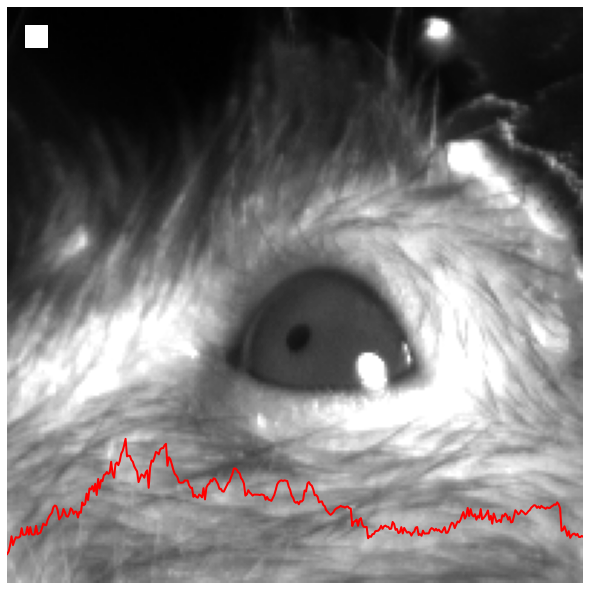

In [470]:
# Set plotting zone for pupil trace
pupil_hmin = 10
pupil_hmax = ny*0.25
# Convert pupil trace to fit in zone
pupilx = hutils.convert_range(np.array(xv), oldmin=min(xv), oldmax=max(xv), 
                    newmin=0, newmax=nx)
pupily = hutils.convert_range(np.array(yv), oldmin=min(yv), oldmax=max(yv), 
                    newmin=pupil_hmin, newmax=pupil_hmax)
# Stimulus indicator
stim_yloc = 5
stim_yheight = 5
stim_loc = np.ones((len(frame_ixs),))
stim_val = np.zeros((len(frame_ixs),)) 
for si in stim_on_ixs:
    if si < xv.max():
        stim_val[si:si+nframes_on] = 1.
# stim_val *= stim_yloc
# stim_val += stim_yheight
stim_marker_size = 500
stim_pos = (10, ny-10)
stim_sizes = stim_val*stim_marker_size

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = pl.subplots(figsize=(8,8))
ax.axis('off')
pl.subplots_adjust(left=0, right=1, bottom=0, top=1)
# ax.set_xlim(( min(x), max(x)))
# ax.set_ylim((y.min(), y.max()))
im = ax.imshow(movcrop[0], extent=(0, nx, 0, ny), cmap='gray')
line, = ax.plot(pupilx, pupily, color='r', lw=2)
# dot = ax.scatter(stim_loc*stim_pos[0], stim_loc*stim_pos[1], 
#                   marker='s', color='w', s=stim_sizes)
dot = ax.scatter(stim_pos[0], stim_pos[1], 
                  marker='s', color='w', s=stim_marker_size)

In [471]:
# Set playblack
video_rate=20.
interval = (1./video_rate) * 1E3

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    #dot.set_data([], [])
    dot.set_sizes([])
    im.set_data(np.zeros((nx, ny)))
    return (im, line, dot,)

# animation function. This is called sequentially
def update(num, x, y, z, s, im, line, dot):
    line.set_data(x[:num], y[:num])
    #dot.set_data(x[:num], s[:num])
    dot.set_sizes( [s[num]] )
    im.set_data(z[num])
    #line.axes.axis([0, 10, 0, 1])
    return (im, line, dot,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, update, len(pupilx), 
                            fargs=[pupilx, pupily, movcrop, stim_sizes, im, line, dot],
                            #fargs=[zv, imgx, imgy, line, sx, sy, dot],
                            init_func=init, interval=interval, blit=True)

outf = os.path.join(output_dir, 'test_1min_stimblock.gif')
anim.save(outf, writer='imagemagick', fps=video_rate)

anim

In [361]:
len(z)

51

In [188]:
# import sys
# !conda install --yes --prefix {sys.prefix} imagemagick

In [190]:
# writergif = animation.ImageMagickWriter(fps=20) 
# ani.save(outf, writer=writergif)

In [191]:
Image(url=outf)

# Scratch

In [258]:
in_rate=20.
out_rate=20.
stim_dur = fov_params['stim_dur']

desired_nframes = int((stim_dur + iti_pre + iti_post)*out_rate)
iti_pre_ms=iti_pre*1000

new_stim_on = int(round(iti_pre*out_rate))
nframes_on = int(round(stim_dur*out_rate))
feature_to_load = 'pupil_area'

In [271]:
feature_name = 'pupil_maj'
if len(g) < min_nframes:
    npad = min_nframes - len(g)
    vals = np.pad(g[feature_name].values, pad_width=((0, npad)), mode='edge')
else:
    vals = g[feature_name].values[0:min_nframes]
print(len(vals))

50


In [265]:
import pylab as pl
%matplotlib notebook

<IPython.core.display.Javascript object>


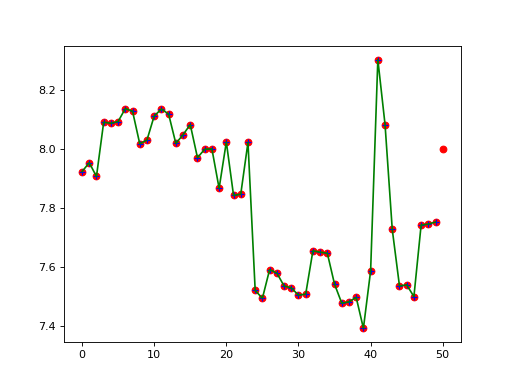

In [274]:
pl.figure()
pl.plot(g[feature_name].values, 'ro')
pl.plot(vals, 'b+')

out_ixs, out_s = dlcutils.resample_traces(vals, in_rate=in_rate, out_rate=out_rate)

pl.plot(out_s, 'g-')

In [278]:
p_=[]
for trial, g in pupiltraces.groupby(['trial']):
    if len(g[feature_name]) < min_nframes:
        npad = min_nframes - len(g[feature_name])
        vals = np.pad(g[feature_name].values, pad_width=((0, npad)), mode='edge')
    else:
        vals = g[feature_name].values[0:min_nframes]
    #print(len(vals))
    out_ixs, out_s = dlcutils.resample_traces(vals, in_rate=in_rate, out_rate=out_rate)
    
    currconfig = g['config'].unique()[0]
    new_stim_on = (iti_pre_ms/1E3)*out_rate 
    pdf = pd.DataFrame({feature_name: out_s})
    
    pdf['stim_on'] = new_stim_on
    pdf['config'] = currconfig
    pdf['trial'] = trial
    p_.append(pdf)


In [304]:
g.shape

(51, 11)

In [281]:
print(trial)
if len(g[feature_name]) < min_nframes:
    npad = min_nframes - len(g[feature_name])
    vals = np.pad(g[feature_name].values, pad_width=((0, npad)), mode='edge')
else:
    vals = g[feature_name].values[0:min_nframes]
#print(len(vals))
out_ixs, out_s = dlcutils.resample_traces(vals, in_rate=in_rate, out_rate=out_rate)

1280


In [319]:
importlib.reload(dlcutils)


<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [320]:
binned_pupil = binned_pupil = dlcutils.bin_pupil_traces(pupiltraces, #feature_name=feature_name,          
                                        in_rate=in_rate, out_rate=out_rate,  
                                        min_nframes=desired_nframes, iti_pre_ms=iti_pre_ms)


In [321]:
binned_pupil.head()


,pupil_maj,pupil_min,pupil_area,run_label,run_num,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms,stim_on,config,frame_ix
0,5.228245,4.789329,78.664809,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,0
1,5.260439,4.828499,79.796533,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,1
2,5.277987,4.799067,79.574692,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,2
3,5.285391,4.815598,79.960813,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,3
4,5.343534,4.815553,80.839691,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,4


In [322]:
incl_ixs = np.arange(new_stim_on, new_stim_on+nframes_on).astype(int)

for t, g in binned_pupil.groupby(['trial']):
    g

In [331]:
incl_ixs = np.arange(new_stim_on, new_stim_on+nframes_on).astype(int)
print(len(incl_ixs))

g['frame_ix'].isin(incl_ixs).mean()


10


0.2

In [332]:
incl_ixs

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [353]:
dfs2 = pd.concat([g[g['frame_ix'].isin(incl_ixs)].mean() \
           for t, g in binned_pupil.groupby(['trial'])], axis=1).T
dfs2.head()


,pupil_maj,pupil_min,pupil_area,run_label,run_num,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms,stim_on,frame_ix
0,5.024241,4.915799,77.585163,1.0,1.0,1.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
1,8.181423,7.173021,184.362163,1.0,1.0,2.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
2,8.633710,7.402814,200.823032,1.0,1.0,3.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
3,8.345367,7.191403,188.554539,1.0,1.0,4.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
4,7.621890,6.615875,158.466496,1.0,1.0,5.0,500.0,1000.0,1000.0,2000.0,20.0,24.5


In [355]:
np.where(dfs2['pupil_maj']!=pupildf[feature_name].values)

(array([793]),)

In [356]:
dfs2['pupil_maj']

0       5.024241
1       8.181423
2       8.633710
3       8.345367
4       7.621890
          ...   
1274    4.767051
1275    6.257644
1276    7.362364
1277    6.118671
1278    7.699233
Name: pupil_maj, Length: 1279, dtype: float64

In [359]:
dfs2[feature_name].loc[793]

nan

In [358]:
pupildf[feature_name].loc[793]

nan

<IPython.core.display.Javascript object>


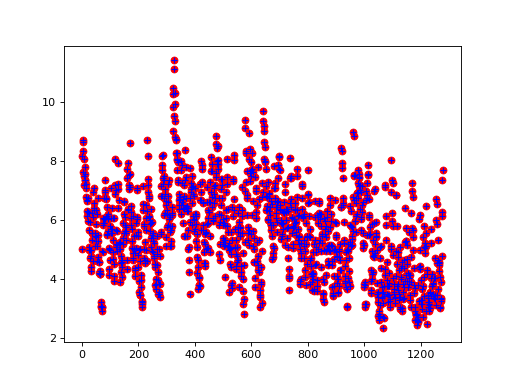

In [354]:
pl.figure()
pl.plot(dfs2['pupil_maj'].values, 'ro')
pl.plot(pupildf[feature_name].values, 'b+') #g_r

In [279]:
pupildfs = pd.concat(p_, axis=0).reset_index(drop=True)

In [280]:
pupildfs

,pupil_maj,stim_on,config,trial
0,5.228245,20.0,config030,1
1,5.260439,20.0,config030,1
2,5.277987,20.0,config030,1
3,5.285391,20.0,config030,1
4,5.343534,20.0,config030,1
...,...,...,...,...
63945,7.540769,20.0,config027,1280
63946,7.500896,20.0,config027,1280
63947,7.742641,20.0,config027,1280
63948,7.746040,20.0,config027,1280


In [338]:
    trials_ = sorted(pupiltraces['trial'].unique())
    frames_ = np.arange(0, desired_nframes)

    pupil_trialmat = pd.DataFrame(np.vstack([p[feature_name].values for trial, p in binned_pupil.groupby(['trial'])]),
                                  index=trials_, columns=frames_)
    pupil_r = pupil_trialmat.T.unstack().reset_index().rename(columns={'level_0': 'trial', 
                                                                       'level_1': 'frame',
                                                                       0: feature_name})
    pupil_r['frame_int'] = [int(round(f)) for f in pupil_r['frame']]
    interp_frame_ixs = list(sorted(pupil_r['frame'].unique()))
    pupil_r['frame_ix'] = [interp_frame_ixs.index(f) for f in pupil_r['frame']]
    pupil_r.shape

(63950, 5)

In [339]:
pupil_r

,trial,frame,pupil_maj,frame_int,frame_ix
0,1,0,5.228245,0,0
1,1,1,5.260439,1,1
2,1,2,5.277987,2,2
3,1,3,5.285391,3,3
4,1,4,5.343534,4,4
...,...,...,...,...,...
63945,1280,45,7.540769,45,45
63946,1280,46,7.500896,46,46
63947,1280,47,7.742641,47,47
63948,1280,48,7.746040,48,48


In [341]:
        pupildf = dlcutils.get_pupil_df(pupil_r, trial_epoch=pupil_epoch, 
                                new_stim_on=new_stim_on, nframes_on=nframes_on)
    

In [342]:
pupildf

,trial,frame,pupil_maj,frame_int,frame_ix
0,1.0,24.5,5.024241,24.5,24.5
1,2.0,24.5,8.181423,24.5,24.5
2,3.0,24.5,8.633710,24.5,24.5
3,4.0,24.5,8.345367,24.5,24.5
4,5.0,24.5,7.621890,24.5,24.5
...,...,...,...,...,...
1274,1276.0,24.5,4.767051,24.5,24.5
1275,1277.0,24.5,6.257644,24.5,24.5
1276,1278.0,24.5,7.362364,24.5,24.5
1277,1279.0,24.5,6.118671,24.5,24.5
